# POLYNOMIAL REGRESSION

To explain polynomial regression for a dataset with two feature instances ($x_1$ and $x_2$), where each feature instance has two data points, let's consider a hypothetical dataset. Unlike linear regression, polynomial regression allows us to model the relationship between the independent variables ($x_1$ and $x_2$) and the dependent variable ($y$) as a polynomial, which can capture more complex relationships.

### Example Dataset:

| Data Point | $x_1$ (Feature 1) | $x_2$ (Feature 2) | $y$ (Target) |
|------------|-------------------|-------------------|--------------|
| 1          | $x_{11}$          | $x_{12}$          | $y_1$        |
| 2          | $x_{21}$          | $x_{22}$          | $y_2$        |

### Polynomial Regression Model:

For illustrative purposes, let's consider a polynomial regression model that includes terms up to the second degree for each feature and an interaction term between $x_1$ and $x_2$. The model can be represented as:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2$

Where:
- $\hat{y}$is the predicted value of the target variable.
- $\theta_0$ is the intercept term.
- $\theta_1$ and $\theta_2$ are the coefficients for the linear terms of features $x_1$ and $x_2$, respectively.
- $\theta_3$ and $\theta_4$ are the coefficients for the squared terms of features $x_1^2$ and $x_2^2$, respectively, allowing the model to capture non-linear relationships.
- $\theta_5$ is the coefficient for the interaction term $x_1 x_2$, allowing the model to capture the combined effect of $x_1$ and $x_2$ on $y$. Some simple models may not include the interaction term. Therefore the $\theta_5 x_1 x_2$ could be ommited, if we were talking about this exact formula.

### Objective:

The objective in polynomial regression, similar to linear regression, is to find the values of the coefficients $\theta_0, \theta_1, \theta_2, \theta_3, \theta_4,$and $\theta_5$ that minimize the difference between the predicted values $\hat{y}$and the actual target values $y$ in the dataset. This is typically achieved by minimizing a cost function, such as the Mean Squared Error (MSE), which for our dataset with two data points becomes:
\
$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$\
$\text{MSE} = \frac{1}{2} \left[ \text{Residual}_1^2 + \text{Residual}_2^2 \right]$
\
Where:
- $\text{Residual}_1 = y_1 - (\theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{11}^2 + \theta_4 x_{12}^2 + \theta_5 x_{11} x_{12})$
- $\text{Residual}_2 = y_2 - (\theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{21}^2 + \theta_4 x_{22}^2 + \theta_5 x_{21} x_{22})$

### Solution:

The optimal values of the coefficients can be found using various optimization methods, such as Gradient Descent, since the presence of higher-degree terms and interaction terms generally precludes an analytical solution like the Normal Equation used in linear regression.

### Interpretation:

Once the optimal coefficients are determined, the polynomial regression model can predict the target variable $y$ for any given values of $x_1$ and $x_2$ using the model equation. This model can capture more complex relationships than a simple linear model due to the inclusion of higher-degree terms and interaction terms, making it more flexible in fitting the underlying pattern in the data. However, care must be taken to avoid overfitting, especially as the degree of the polynomial increases.

# PARTIAL DERIVATIVES AND GRADIENT DESCENT
They are the same as in linear regression, but the only difference is that we have more parameters to update. The number of parameters is equal to the number of features raised to the power of the degree of the polynomial. 

# POLYNOMIAL REGRESSION FROM SCRATCH

In [44]:
# CREATE DATA

import numpy as np
np.random.seed(42)

# need to add ones due to the bias term
feature_0 = np.ones((1000, 1))
# actual data
feature_1 = 2 * np.random.rand(1000, 1)
feature_2 = 2 * np.random.rand(1000, 1)

X = np.c_[feature_0, feature_1, feature_2]
y = X[:, 2] ** 2

In [45]:
print(X)

[[1.         0.74908024 0.37026586]
 [1.         1.90142861 1.08380189]
 [1.         1.46398788 1.74589167]
 ...
 [1.         0.27363726 0.13791603]
 [1.         1.90047471 0.11410944]
 [1.         0.89201155 0.56437415]]


In [46]:
print(y)

[1.37096805e-01 1.17462655e+00 3.04813773e+00 2.14461314e+00
 2.60216354e+00 1.73598210e+00 1.91698737e+00 2.88453302e+00
 2.49336459e-01 9.58147180e-01 1.95734469e-01 3.90195238e+00
 3.56499215e+00 6.21789382e-03 1.99134530e+00 3.42433780e+00
 1.30429821e-01 1.29024714e+00 3.35247529e+00 4.60931785e-03
 1.94558012e+00 3.53665729e-01 3.41803330e+00 3.77181646e+00
 3.56655681e+00 8.99516493e-01 2.97247013e+00 2.85305475e+00
 4.07300448e-01 2.74840345e+00 5.47826011e-03 1.42215107e+00
 2.11616261e-01 5.81454958e-02 2.36871810e-02 1.93927224e+00
 4.62059964e-01 2.10114749e+00 1.70858051e-02 3.97631989e-01
 1.16420342e+00 2.50097249e+00 4.06412633e-01 1.56696006e+00
 3.13982628e+00 1.51714987e+00 2.17080468e-01 2.38159256e-03
 3.02828820e+00 1.80955135e-03 3.06041206e+00 1.11909797e+00
 3.52739257e+00 2.55221863e+00 3.98348996e+00 4.91995110e-01
 2.35431148e+00 6.46193837e-01 9.21122444e-01 1.57505243e+00
 3.05324680e+00 3.87368110e+00 2.36097615e+00 6.98116337e-01
 7.10166893e-01 2.176110

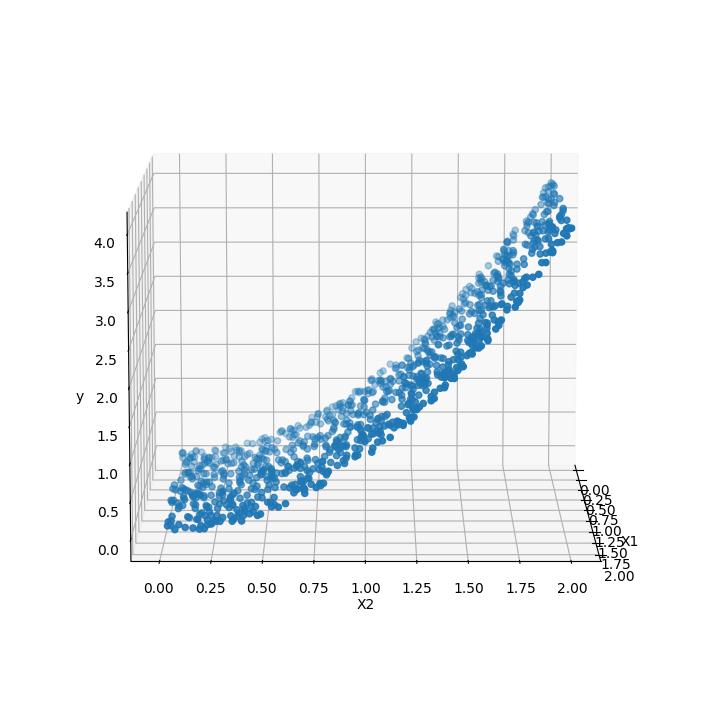

In [47]:
# PLOT 3D DATA

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 1], X[:, 2], y)
ax.azim = 0
ax.elev = 10
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

In [48]:
# SPLIT THE DATA INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from my_extensions import MyModelExtensions


# CREATE A POLYNOMIAL REGRESSION MODEL FROM SCRATCH

# Inherit from the Extension class to use its methods for visualization and evaluation
class MyPolynomialRegression(MyModelExtensions):
    """
    Polynomial regression model.
    
    It relies on the Linear Regression model. All the computations are the same as in basic Linear Regression. But in order to predict the non-linear relationship between the features and the target, we need to transform the features into polynomial features by raising them in the range of values till the max degree of polynomial. See the __polynomial_features method.
    """

    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000):
        super().__init__()
        self.degree = degree # max degree of the polynomial
        self.learning_rate = learning_rate # how much to update the parameters
        self.n_iterations = n_iterations # how many times to update the parameters
        self.thetas = [] # parameter bias and weights
        self.losses = [] # to store the loss at each iteration

    def fit(self, X, y):
        """
        Fit the model to the data X and y. Meaning let the model learn the parameters.
        :param X: Features
        :param y: Labels
        :return: None
        """        

        # transform the features into polynomial features
        X_polynomial = self.__polynomial_features(X, self.degree)

        n_samples, n_features = X_polynomial.shape
        
        # initialize the parameters with random values
        self.thetas = np.random.rand(n_features)
        print("Initial parameters: ", self.thetas)

        for _ in range(self.n_iterations):
            # prediction
            y_prediction = np.dot(X_polynomial, self.thetas)

            # compute the Mean Absolute Error (only for visualization, not used in the optimization process)
            loss = np.mean(np.abs(y - y_prediction))
            self.losses.append(loss)

            # compute gradient vector
            gradient_vector = 2 / n_samples * np.dot(X_polynomial.T, (y_prediction - y))
            
            # update the parameters
            self.thetas = self.thetas - self.learning_rate * gradient_vector

    def predict(self, X):
        # transform the features into polynomial features
        X_polynomial = self.__polynomial_features(X, self.degree)

        # make predictions
        return X_polynomial.dot(self.thetas)

    def __polynomial_features(self, X: np.array, degree: int) -> np.array:
        """
        Private method to create polynomial features.
        With each iteration we add as a new columns the original features where each value of original feature is raised to the power of the iteration.
        Note that in this example we are working with 2nd degree polynomial and with 3 features. (1x bias and 2x weights) therefore the result after the transformation of original dataset to polynomial is 6 columns => resulting also into 1x bias and 5x weights.
        
        :param X: Feature dataset
        :param degree: The maximum degree of the polynomial, meaning how many times we raise the original features.
        :return: Feature dataset with polynomial features. 
        """
        X_polynomial = X
        
        for i in range(2, degree + 1):
            # X_polynomial = np.c_[X_polynomial, X ** i] # Explained in a cell below.
            if not i:
                X_polynomial = np.c_[X_polynomial, X ** i]
            else:
                X_polynomial = np.c_[X_polynomial, X[:, 1:] ** i]            
        return X_polynomial

In [50]:
# EXPLANATION HOW THE FEATURES ARE TRANSFORMED INTO POLYNOMIAL FEATURES

def __polynomial_features(X, degree):
    X_polynomial = X
    for i in range(2, degree + 1):
        # Author of the book took the whole dataset (including bias term), raised it to the power of the iteration and 
        # then appended that to the original dataset.
        # I rather decided to raise only the original features to the power of the iteration, it is more clear to me
        # because it more corresponds with the formula of polynomial regression. The result is however almost the same
        # for both options.
        # X_polynomial = np.c_[X_polynomial, X ** i]
        if not i:
            X_polynomial = np.c_[X_polynomial, X ** i]
        else:
            X_polynomial = np.c_[X_polynomial, X[:, 1:] ** i]
    return X_polynomial


X = np.array(
    [[1, 1, 2],
     [1, 3, 4],
     [1, 5, 6]]
)

# Notice that each iteration in the function above adds new columns to the original dataset and at that iteration we 
# raise the original features to the power of the iteration. Also notice that we omitted the interaction term in this example.
print("Original features:\n", X)
print("Polynomial features 2nd degree:\n", __polynomial_features(X, 2))
print("Polynomial features 3rd degree:\n", __polynomial_features(X, 3))

Original features:
 [[1 1 2]
 [1 3 4]
 [1 5 6]]
Polynomial features 2nd degree:
 [[ 1  1  2  1  4]
 [ 1  3  4  9 16]
 [ 1  5  6 25 36]]
Polynomial features 3rd degree:
 [[  1   1   2   1   4   1   8]
 [  1   3   4   9  16  27  64]
 [  1   5   6  25  36 125 216]]


In [51]:
# TRAIN THE MODEL

model = MyPolynomialRegression(degree=2, learning_rate=0.01, n_iterations=6_000)
model.fit(X_train, y_train)


Initial parameters:  [0.26170568 0.2469788  0.90625458 0.2495462  0.27194973 0.75939826]


In [52]:
# SHOW BEST PARAMETERS

print(f"Best parameters: {model.show_parameters()}")

Best parameters: [-0.01357022  0.00819395  0.09771884 -0.02572971 -0.00415937  0.95414361]


In [53]:
# MAKE PREDICTIONS

y_pred = model.predict(X_test)


In [54]:
# EVALUATE THE MODEL USING CUSTOM MAE FORMULA

mae = np.mean(np.abs(y_test - y_pred))

print(f"MAE: {mae}")

MAE: 0.012095217182293828


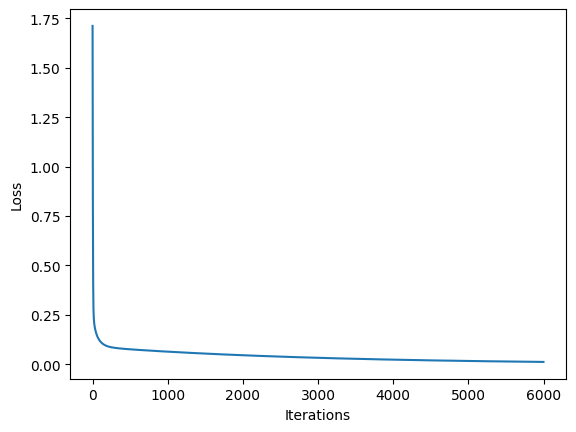

In [55]:
# PLOT THE LOSS CURVE

model.show_loss_curve()


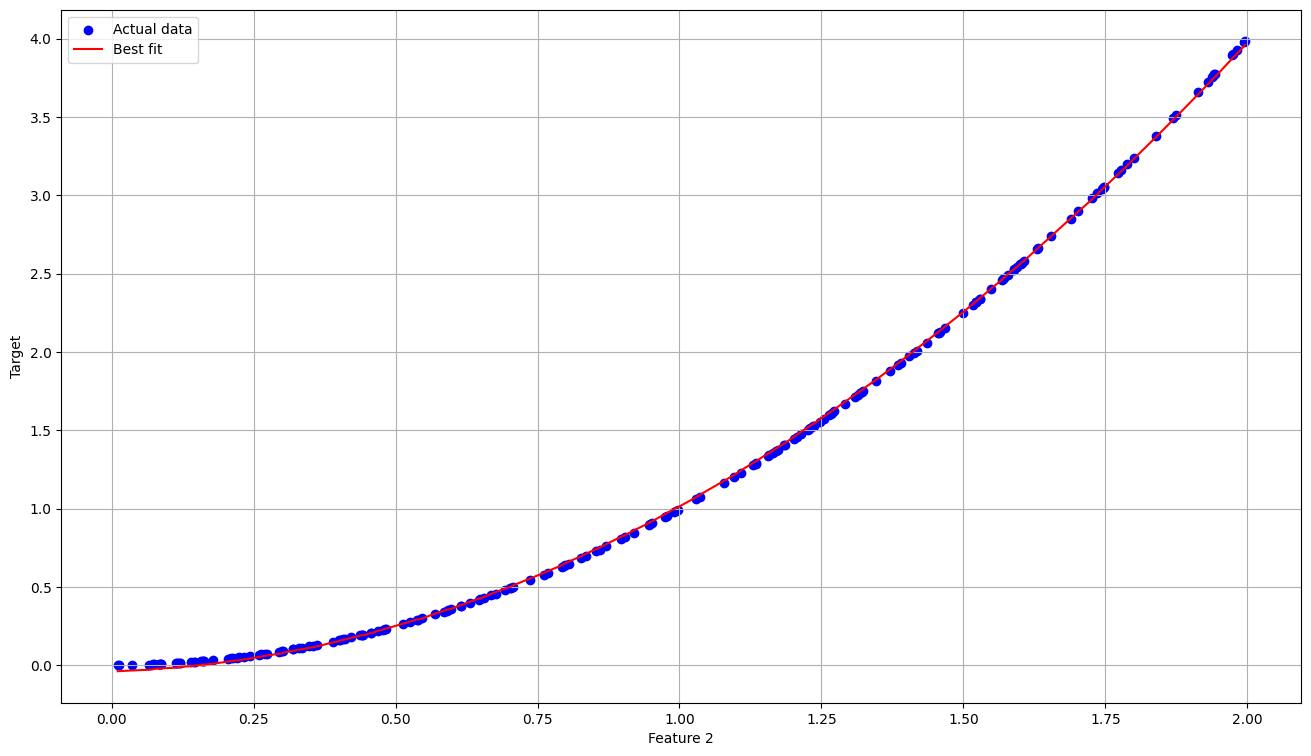

In [56]:
# VISUALIZE THE BEST FIT LINE ON 2D PLOT USING EXISTING DATA (ONLY 1 FEATURE VS TARGET)
fig = plt.figure(figsize=(16, 9))

# sort the labels because then the result of plt.plot is just mess, and you would have to use plt.scatter instead, which does not look so good
X_test_sorted = X_test[:, 2][np.argsort(y_test)]
y_pred_sorted = y_pred[np.argsort(y_test)]
y_test_sorted = np.sort(y_test)

plt.scatter(X_test_sorted, y_test_sorted, label="Actual data", color='b')
plt.plot(X_test_sorted, y_pred_sorted, label="Best fit", color='r')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()